In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('human-freedom-index-2019.csv')
print(df.columns)

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)


In [3]:
score_cols= [col for col in df.columns if 'pf_identity' in col] + [
'pf_score', #personal freedom (score)
 'pf_rank', #personal freedom (rank)
 'ef_score', #economic freedom(score)
 'ef_rank', #economic freedom(rank)
 'hf_score', #human freedom (score)
 'hf_rank', #human freedom (rank)
]
important_cols=['year', 'ISO_code','countries','region']+score_cols


In [4]:
df[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,2017,DZA,Algeria,Middle East & North Africa,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,2017,AGO,Angola,Sub-Saharan Africa,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,2017,ARM,Armenia,Caucasus & Central Asia,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,-,10,10,10,10,10,9.29,7,8.18,6,8.73,4
1616,2008,DNK,Denmark,Western Europe,-,10,10,10,10,10,9.49,3,7.98,9,8.73,4
1617,2008,CHE,Switzerland,Western Europe,-,10,10,10,10,10,9.31,6,8.35,4,8.83,3
1618,2008,NZL,New Zealand,Oceania,-,10,10,10,10,10,9.42,4,8.46,3,8.94,2


In [5]:
new_df=df[important_cols].replace('-',np.nan)
for score_col in score_cols:
    new_df[score_col]=pd.to_numeric(new_df[score_col])
new_df    

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


In [6]:
new_df.to_csv('filtered.csv', index=False)  #dataframe limpio


# Parte 1

## 1 Estadisticos descriptivos

In [7]:
Max=new_df.loc[:,'pf_identity_sex_male':'hf_rank'].max() #calculo de los valores máximos por columna
Min=new_df.loc[:,'pf_identity_sex_male':'hf_rank'].min() #cálculo de los valores mínimos por columna
R=Max-Min #Rango
print('Rango de cada variable \n%s'%R)


Rango de cada variable 
pf_identity_sex_male       10.00
pf_identity_sex_female     10.00
pf_identity_sex            10.00
pf_identity_divorce        10.00
pf_identity                10.00
pf_score                    7.34
pf_rank                   161.00
ef_score                    6.53
ef_rank                   161.00
hf_score                    5.43
hf_rank                   161.00
dtype: float64


Si se quiere comparar cada país la media de cada variable sería un buen punto de partida. Sin embargo, si no se esta seguro de que la distribución es normal la media sería la mejor opción. Si hay ouliers se debe tener en cuenta que la media es sensible a estos, no así la mediana. El punto 1 muestra que el rango entre los valores máximos y minimos en cada variable son muy grandes en algunos casos. 

In [8]:
hf_mean=new_df['hf_score'].mean()
hf_median=new_df['hf_score'].median()
hf_std=new_df['hf_score'].std()

pf_mean=new_df['pf_identity'].mean()
pf_median=new_df['pf_identity'].median()
pf_std=new_df['pf_identity'].std()

print('Media Mediana y desvio estandar de hf_score: \n %s\n %s \n %s'%(hf_mean, hf_median, hf_std))
print('\n'*2)
print('Media Mediana y desvio estandar de pf_identity: \n %s\n %s \n %s'%(pf_mean, pf_median, pf_std))


Media Mediana y desvio estandar de hf_score: 
 6.978214285714286
 6.9 
 1.0562392335897268



Media Mediana y desvio estandar de pf_identity: 
 7.280649350649351
 8.8 
 3.1815770188080887


In [9]:
America_hf_mean=new_df[new_df.region == 'Latin America & the Caribbean'].hf_score.mean()
America_hf_median=new_df[new_df.region=='Latin America & the Caribbean'].hf_score.median()
America_hf_std=np.std(new_df[new_df.region == 'Latin America & the Caribbean'].hf_score)

America_pf_mean=new_df[new_df.region == 'Latin America & the Caribbean'].pf_identity.mean()
America_pf_median=new_df[new_df.region=='Latin America & the Caribbean'].pf_identity.median()
America_pf_std=np.std(new_df[new_df.region == 'Latin America & the Caribbean'].pf_identity)


print('Media Mediana y desvio estandar de hf_score: \n %s\n %s \n %s'%(America_hf_mean, America_hf_median, America_hf_std))
print('\n'*2)
print('Media Mediana y desvio estandar de pf_identity: \n %s\n %s \n %s'%(America_pf_mean, America_pf_median,America_pf_std))


Media Mediana y desvio estandar de hf_score: 
 7.036976744186046
 7.02 
 0.6336654836706834



Media Mediana y desvio estandar de pf_identity: 
 8.582170542635659
 10.0 
 1.8721934908121116


O de otra forma por que std me tira NaN

Si hay muchas modas no tiene sentido calcularla. Ofrece la ventaja que no se ve afectada por los outliers. La misma es facil
de interpretar, por lo que no estaria mal calcularla.

In [10]:
America_hf_mode=new_df[new_df.region == 'Latin America & the Caribbean'].hf_score.mode()
America_pf_mode=new_df[new_df.region == 'Latin America & the Caribbean'].pf_identity.mode()
print('moda hf_score \n', America_hf_mode[0])
print('moda pf_identity \n', America_pf_mode[0] )

moda hf_score 
 6.72
moda pf_identity 
 10.0


In [11]:
World_hf_mode=new_df['hf_score'].mode()
World_pf_mode=new_df['pf_identity'].mode()
print('moda hf_score \n', World_hf_mode[0])
print('moda pf_identity \n', World_pf_mode[0] )

moda hf_score 
 6.75
moda pf_identity 
 10.0


In [12]:
#def outliers(data, n):
#    #calculo media y desvio estandar
#    data_mean , data_std = np.mean(data), np.std(data)
#    #limite para outliers
#    cut_off=data_std*n
#    lim_inf, lim_sup = data_mean-cut_off, data_mean+cut_off
#    #identifico ouliers
#    outliers = [x for x in data if x < lim_inf or x > lim_sup]
#    print('Cantidad de outliers: %d' % len(outliers))
#    # remove outliers
#    outliers_removed = [x for x in data if x >= lim_inf and x <= lim_sup]
#    print('No outliers: %d' % len(outliers_removed))
#     
#    
#outliers(new_df['pf_identity'],2.5)

In [77]:
def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_salarios_outlier = (
        np.abs(interesting_col - np.mean(interesting_col)) <= (2.5* np.std(interesting_col)))
    return dataset[mask_salarios_outlier]

hf_score_clean = clean_outliers(new_df, 'hf_score').hf_score
pf_identity_clean=clean_outliers(new_df, 'pf_identity').pf_identity
print("Filas removidas", len(new_df) - len(pf_identity_clean))
print("Valor máximo", pf_identity_clean.max())

Filas removidas 80
Valor máximo 10.0


In [14]:
new_df.shape

(1620, 16)

In [15]:
Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

year                       5.0000
pf_identity_legal          3.0000
pf_identity_sex_male      10.0000
pf_identity_sex_female     0.0000
pf_identity_sex            5.0000
pf_identity_divorce        5.0000
pf_identity                5.0000
pf_score                   2.2325
pf_rank                   77.0000
ef_score                   1.2200
ef_rank                   77.0000
hf_score                   1.6000
hf_rank                   77.0000
dtype: float64


In [16]:
new_df_out = new_df[~((new_df< (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df_out.shape

(1220, 16)

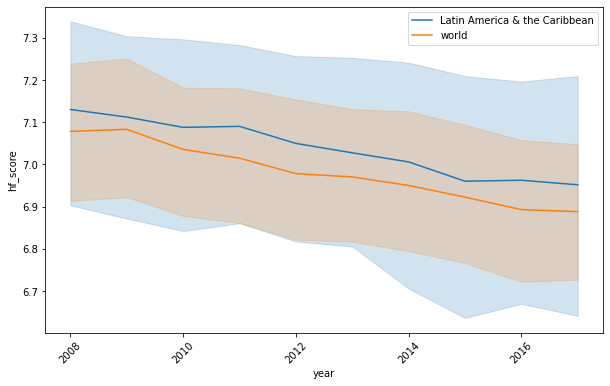

In [17]:

plt.figure(figsize=(10,6))
sns.lineplot(data=new_df[new_df.region == 'Latin America & the Caribbean'], x='year', y='hf_score', label='Latin America & the Caribbean')
sns.lineplot(data=new_df, x='year', y='hf_score', label='world')
plt.xticks(rotation=45);

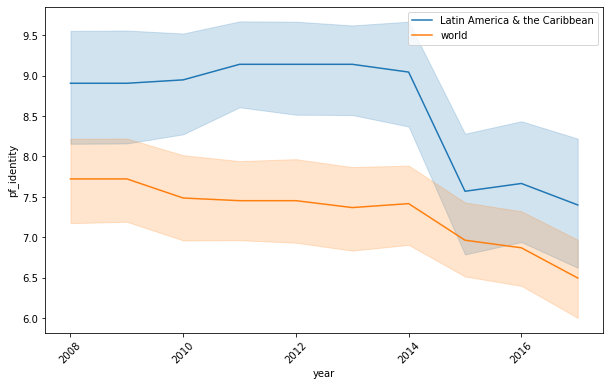

In [47]:

plt.figure(figsize=(10,6))
sns.lineplot(data=new_df[new_df.region == 'Latin America & the Caribbean'], x='year', y='pf_identity', label='Latin America & the Caribbean')
sns.lineplot(data=new_df, x='year', y='pf_identity', label='world')
plt.xticks(rotation=45);

Text(0.5, 0.98, 'hf_score World Mean vs Region Mean')

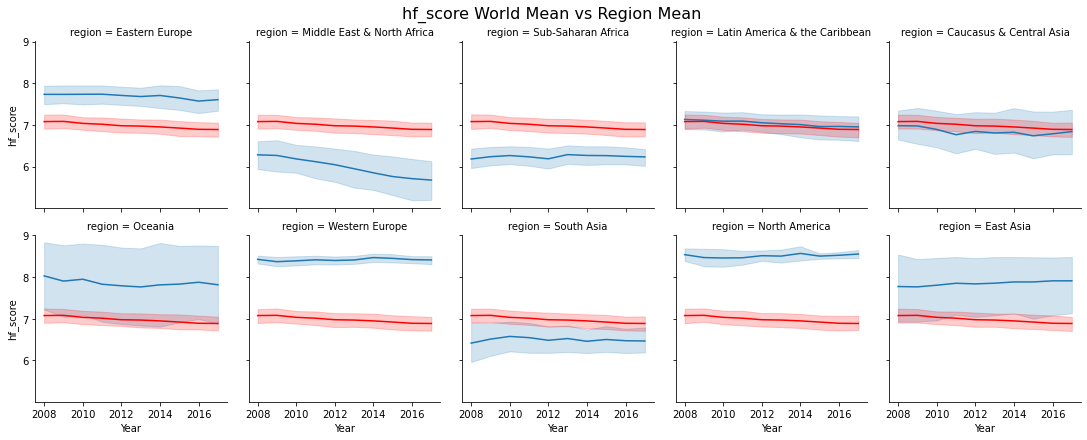

In [79]:
g=sns.FacetGrid(data=new_df,col='region', col_wrap=5)
g.map(sns.lineplot,'year', 'hf_score')
g.map(sns.lineplot, data=new_df, x='year', y='hf_score',color='red', legend='full' )
g.set_axis_labels("Year", "hf_score")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('hf_score World Mean vs Region Mean', fontsize=16)


Text(0.5, 0.98, 'pf_identity World Mean vs Region Mean')

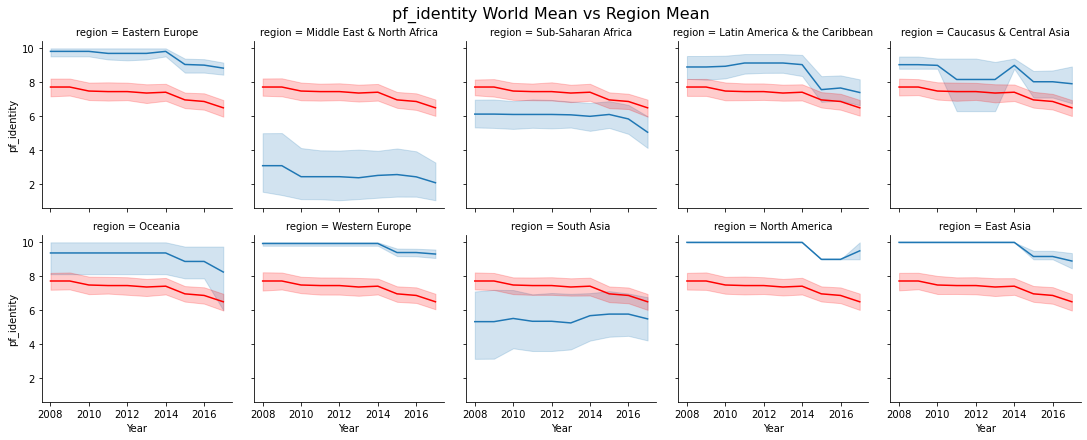

In [33]:
g=sns.FacetGrid(data=new_df,col='region', col_wrap=5)
g.map(sns.lineplot,'year', 'pf_identity')
g.map(sns.lineplot, data=new_df, x='year', y='pf_identity',color='red', legend='full' )
g.set_axis_labels("Year", "pf_identity")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('pf_identity World Mean vs Region Mean', fontsize=16)


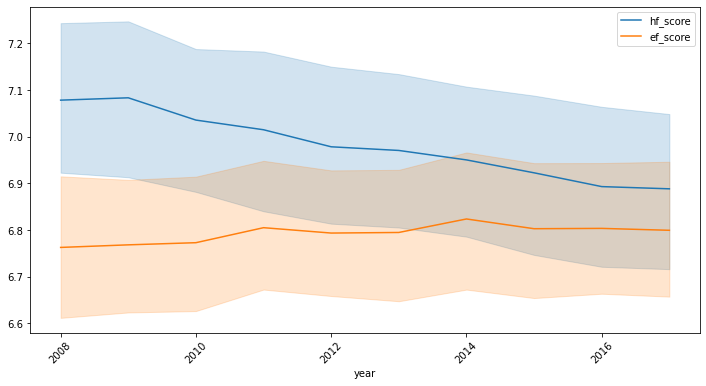

In [46]:
plt.figure(figsize=(12,6))
sns.lineplot(data=new_df, x='year', y='hf_score', label='hf_score')
sns.lineplot(data=new_df, x='year', y='ef_score', label='ef_score')
plt.ylabel('')
plt.xticks(rotation=45);


Text(0.5, 0, '')

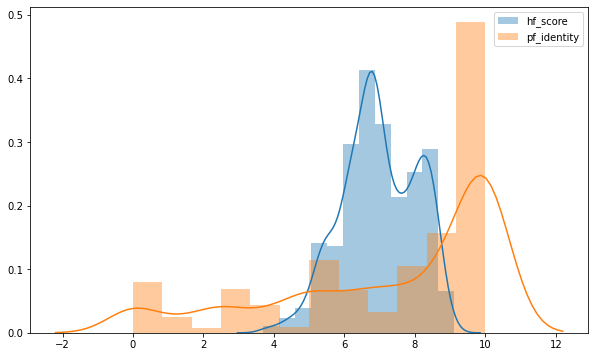

In [71]:

plt.figure(figsize=(10,6))
sns.distplot(new_df.hf_score.dropna(), bins=12, label='hf_score')
sns.distplot(new_df.pf_identity.dropna(), bins=12 , label='pf_identity')
plt.legend()
plt.xlabel('')

Text(0.5, 0, '')

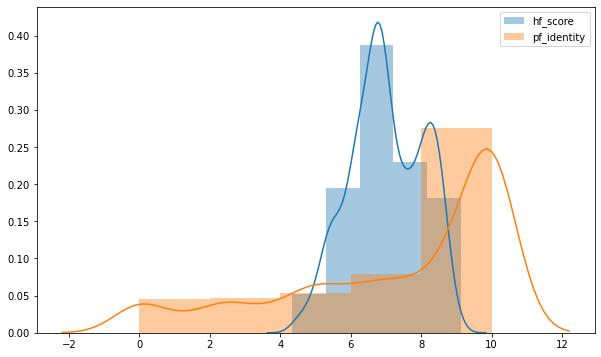

In [82]:
plt.figure(figsize=(10,6))
sns.distplot(hf_score_clean.dropna(), bins=5, label='hf_score')
sns.distplot(pf_identity_clean.dropna(), bins=5 , label='pf_identity')
plt.legend()
plt.xlabel('')

# 1.4

### Analisis de correlacion entre todas las variables

In [84]:
new_df_corr=new_df.corr() 
new_df_corr

,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
year,1.000000,0.024769,-0.017547,-0.022359,-0.022245,-0.088018,-0.108664,-0.104138,0.073885,0.014629,0.074269,-0.062275,0.074202
pf_identity_legal,0.024769,1.000000,0.166994,-0.031828,0.093919,0.164278,0.649434,0.411117,-0.414859,0.179186,-0.160547,0.345950,-0.332615
pf_identity_sex_male,-0.017547,0.166994,1.000000,0.728632,0.940060,0.456093,0.810801,0.592211,-0.591553,0.310027,-0.358127,0.523455,-0.532455
pf_identity_sex_female,-0.022359,-0.031828,0.728632,1.000000,0.918551,0.462970,0.797549,0.564176,-0.550615,0.299012,-0.328870,0.500132,-0.500515
pf_identity_sex,-0.022245,0.093919,0.940060,0.918551,1.000000,0.491902,0.864937,0.622541,-0.615333,0.327648,-0.370238,0.550956,-0.556392
pf_identity_divorce,-0.088018,0.164278,0.456093,0.462970,0.491902,1.000000,0.824428,0.654242,-0.647323,0.305743,-0.339491,0.562088,-0.570181
pf_identity,-0.108664,0.649434,0.810801,0.797549,0.864937,0.824428,1.000000,0.742209,-0.732855,0.359151,-0.402425,0.643354,-0.649204
pf_score,-0.104138,0.411117,0.592211,0.564176,0.622541,0.654242,0.742209,1.000000,-0.986037,0.673663,-0.718720,0.948332,-0.941561
pf_rank,0.073885,-0.414859,-0.591553,-0.550615,-0.615333,-0.647323,-0.732855,-0.986037,1.000000,-0.672075,0.715939,-0.938451,0.950713
ef_score,0.014629,0.179186,0.310027,0.299012,0.327648,0.305743,0.359151,0.673663,-0.672075,1.000000,-0.953260,0.873325,-0.848033


### Mapa de calor para visualizar las correlaciones

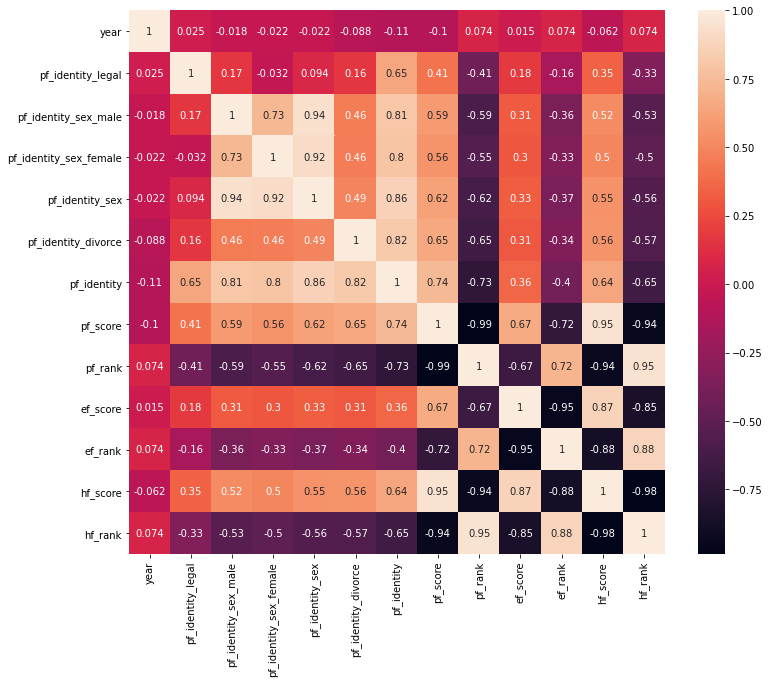

In [85]:
fig, ax=plt.subplots(figsize=(12,10))
sns.heatmap(new_df_corr, annot=True)

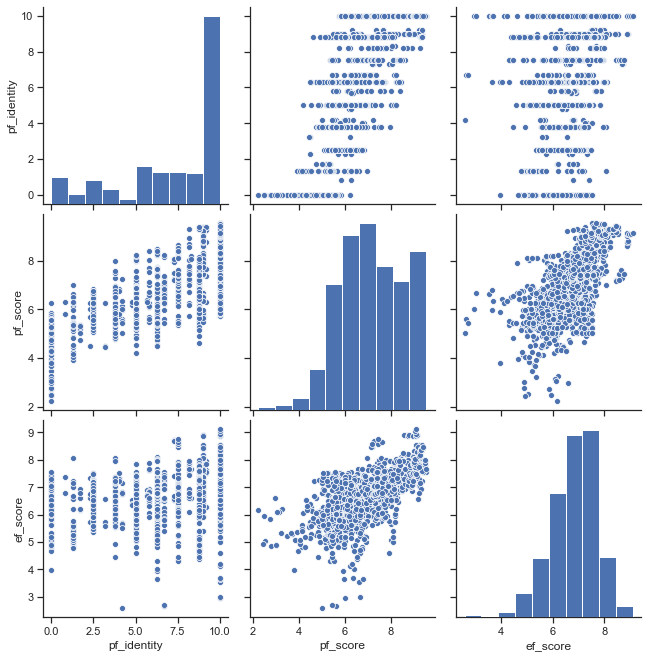

In [94]:
nuevo=new_df[['pf_identity','pf_score','ef_score']]
sns.set(style='ticks',color_codes=True)
g=sns.pairplot(nuevo, height=3)
plt.show()